# Decision Tree Classifier and Post Punning

* iris.data: This contains the feature data of the Iris dataset.
* iris.feature_names: This is a list of feature names, which will be used as column headers.
* iris.target: This contains the target labels (species of Iris).
* iris.target_names: This contains the names of the target classes (species).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
# independent Features
x = df

In [8]:
# Dependent Feature
y =  iris.target

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier()

In [16]:
tree1.fit(x_train,y_train)
y_pred = tree1.predict(x_test)

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 

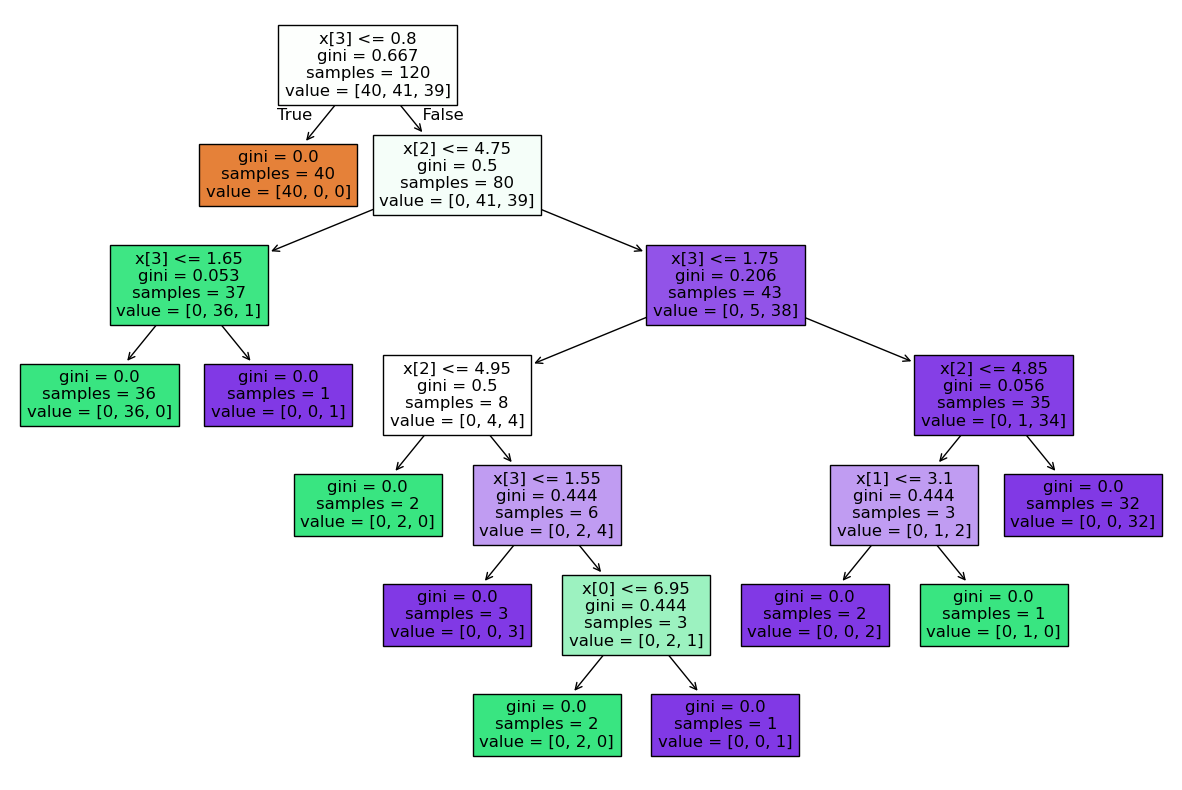

In [17]:
## Visulaize Decision Tree
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(tree1, filled = True)

## It may lead to Overfitting

In [18]:
y_pred = tree1.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Evaluate predictions
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Postpunning : Smaller dataset
### Prepunning : Larger dataset

# Decision Tree Classifier and Pre Punning and hyperparamter tunning

In [29]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None,1,2,3, 10, 20, 30,],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'auto', 'sqrt', 'log2', 10, 20],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]
}

In [30]:
tree2 = DecisionTreeClassifier()

In [31]:
from sklearn.model_selection import GridSearchCV
cv =  GridSearchCV(
    estimator=tree2,
    param_grid=param_grid,  
    refit=True,
    verbose=3,
    cv=5,
    n_jobs = -1,
    scoring = "accuracy"
)

In [32]:
cv.fit(x_train,y_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1, 1.0],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2', 10, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [33]:
cv.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'log_loss',
 'max_depth': 20,
 'max_features': None,
 'splitter': 'random'}

In [34]:
cv.best_score_

np.float64(0.9666666666666668)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = cv.predict(x_test)
# Evaluate predictions
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

